In [4]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


np.random.seed(0)

a = np.random.random(8) 
# tensor([0.3139, 0.4091, 0.3448, 0.3117, 0.2423, 0.3695, 0.2503, 0.5101],dtype=torch.float64)

a /= np.sqrt(np.sum(np.abs(a) ** 2))

a = torch.tensor(a)

In [5]:
num_qubits = 3
dev = qml.device("default.qubit", wires=num_qubits)

# design the quantum circuit
@qml.qnode(dev, interface='torch')
def circuit(params):
    qml.RY(params[0], wires=[0])
    qml.RY(params[1], wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.RY(params[2], wires=[1])
    #####################################
    qml.RY(params[3], wires=[1])
    qml.RY(params[4], wires=[2])
    qml.CNOT(wires=[1, 2])
    qml.RY(params[5], wires=[2])
    ######################################
    qml.RY(params[6], wires=[0])
    qml.RY(params[7], wires=[2])
    qml.CNOT(wires=[0, 2])
    qml.RY(params[8], wires=[2])
    
    return qml.state()

In [6]:
def loss(a,prediction):
    total_loss = torch.norm(a-prediction)**2
    return total_loss

# Define your cost function
def cost(a,params):
    prediction = circuit(params)
    cost = loss(a,prediction)
    return cost

In [7]:
params =np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [8]:
params = Variable(torch.tensor(params), requires_grad=True)

In [9]:
opt = torch.optim.LBFGS([params], lr=0.1)

In [10]:
steps = 10

In [11]:
def closure():
    opt.zero_grad()
    loss = cost(a, params)
    loss.backward()
    return loss

y = []
for i in range(steps): 
    y.append(opt.step(closure))

In [12]:
x =  [i for i in range(0, 10)]

y_3q = [i.detach().numpy() for i in y]

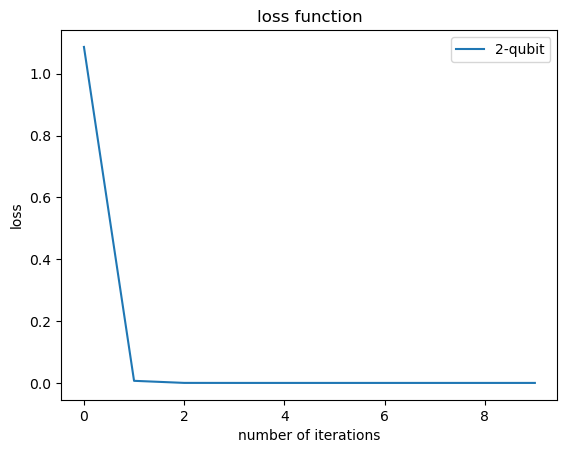

In [14]:
plt.plot(x, y_3q, label = "2-qubit")
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title('loss function')
plt.legend()
plt.show()